<a href="https://colab.research.google.com/github/internetmaks/Analiza-i-wizualizacja-danych-projekt-2023/blob/main/AiWD_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-posthocs


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt

In [ ]:
apps = pd.read_csv('appearances.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
competitions = pd.read_csv('competitions.csv')
game_events = pd.read_csv('game_events.csv')
game_lineups = pd.read_csv('game_lineups.csv')
games = pd.read_csv("games.csv")
player_val = pd.read_csv('player_valuations.csv')
players = pd.read_csv('players.csv')
club_id = pd.read_csv('clubs.csv')

## 1. Z jakiego kraju piłkarze są najbardziej wartościowi?
## 2. Jaki jest średni wzrost  zawodnika na danej pozycji w Premier League?
## 3. Jaki jest średni wzrost  zawodnika na danej pozycji w Premier League?
## 4. Na jakiej pozycji piłkarze mają najwięcej żółtych/czerwonych kartek w Premier League?
## 5. Jaki jest średni wiek kapitanów w danej lidze?



In [ ]:
games['date'] = pd.to_datetime(games['date'])

In [ ]:
games = games[games['date'] >= '2023-08-14']

##Z jakiego kraju piłkarze są najbardziej wartościowi?


In [ ]:
zad1 = pd.merge(players, player_val, on="player_id")

In [ ]:
max_country_data_median = zad1.groupby(['country_of_citizenship'])['market_value_in_eur_y'].median().idxmax()
max_value_median = round(zad1.groupby(['country_of_citizenship'])['market_value_in_eur_y'].median().max(), 2)

max_country_data_mean = zad1.groupby(['country_of_citizenship'])['market_value_in_eur_y'].mean().idxmax()
max_value_mean = round(zad1.groupby(['country_of_citizenship'])['market_value_in_eur_y'].mean().max(), 2)

print(f"Mediana - kraj: {max_country_data_median}, wartość: {max_value_median}")
print(f"Średnia - kraj: {max_country_data_mean}, wartość: {max_value_mean}")

Mediana - kraj: Mexico, wartość: 3200000.0
Średnia - kraj: Mexico, wartość: 5541524.28


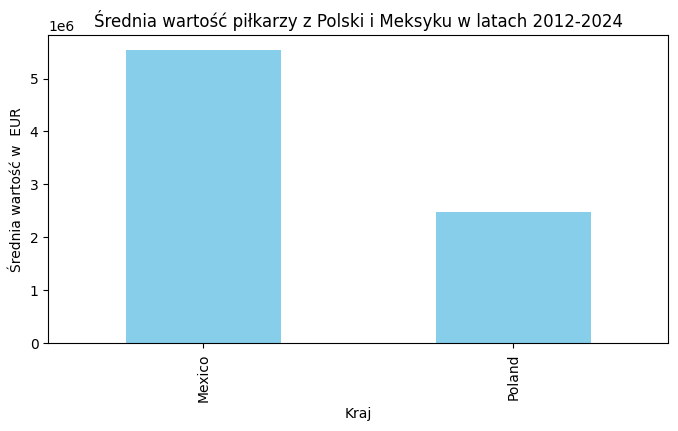

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

selected_countries = ['Poland', 'Mexico']

filtered_data_selected_countries = zad1[zad1['country_of_citizenship'].isin(selected_countries)]
avg_values_by_country_selected = filtered_data_selected_countries.groupby('country_of_citizenship')['market_value_in_eur_y'].mean()

avg_values_by_country_selected = avg_values_by_country_selected.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
avg_values_by_country_selected.plot(kind='bar', color='skyblue')
plt.title('Średnia wartość piłkarzy z Polski i Meksyku w latach 2012-2024')
plt.xlabel('Kraj')
plt.ylabel('Średnia wartość w  EUR') #1e6 oznacza wartosc w milionach
plt.show()


In [ ]:
#TEST LEVENEA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene

selected_countries = ['Poland', 'Mexico']

filtered_data_selected_countries = zad1[zad1['country_of_citizenship'].isin(selected_countries)]

data_poland = filtered_data_selected_countries[filtered_data_selected_countries['country_of_citizenship'] == 'Poland']['market_value_in_eur_y']
data_mexico = filtered_data_selected_countries[filtered_data_selected_countries['country_of_citizenship'] == 'Mexico']['market_value_in_eur_y']

statistic, p_value = levene(data_poland, data_mexico)

print(f"Statystyka testowa Levene'a: {statistic}")
print(f"p-wartość: {p_value}")

Statystyka testowa Levene'a: 74.85872199871767
p-wartość: 6.5942697009794386e-18


In [ ]:
#TEST SAPIRO-WILKA
from scipy.stats import shapiro

data_poland = zad1[zad1['country_of_citizenship'] == 'Poland']['market_value_in_eur_y'].dropna()
data_mexico = zad1[zad1['country_of_citizenship'] == 'Mexico']['market_value_in_eur_y'].dropna()

shapiro_statistic_poland, shapiro_p_value_poland = shapiro(data_poland)
shapiro_statistic_mexico, shapiro_p_value_mexico = shapiro(data_mexico)

print(f"Test Shapiro-Wilka dla Polski:")
print(f"Statystyka testu: {shapiro_statistic_poland}")
print(f"P-value: {shapiro_p_value_poland}")

print(f"Test Shapiro-Wilka dla Meksyku:")
print(f"Statystyka testu: {shapiro_statistic_mexico}")
print(f"P-value: {shapiro_p_value_mexico}")

alpha = 0.05
if shapiro_p_value_poland < alpha:
    print("Dane dla Polski nie pochodzą z rozkładu normalnego - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych dowodów na to, że dane dla Polski nie pochodzą z rozkładu normalnego - nie odrzucamy hipotezy zerowej.")

if shapiro_p_value_mexico < alpha:
    print("Dane dla Meksyku nie pochodzą z rozkładu normalnego - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych dowodów na to, że dane dla Meksyku nie pochodzą z rozkładu normalnego - nie odrzucamy hipotezy zerowej.")

Test Shapiro-Wilka dla Polski:
Statystyka testu: 0.33604156970977783
P-value: 0.0
Test Shapiro-Wilka dla Meksyku:
Statystyka testu: 0.6730170249938965
P-value: 8.463842724521895e-42
Dane dla Polski nie pochodzą z rozkładu normalnego - odrzucamy hipotezę zerową.
Dane dla Meksyku nie pochodzą z rozkładu normalnego - odrzucamy hipotezę zerową.


In [ ]:
#TEST MANNA-WHITNEYA
from scipy.stats import mannwhitneyu

data_poland = zad1[zad1['country_of_citizenship'] == 'Poland']['market_value_in_eur_y']
data_mexico = zad1[zad1['country_of_citizenship'] == 'Mexico']['market_value_in_eur_y']

mannwhitneyu_statistic, mannwhitneyu_p_value = mannwhitneyu(data_poland, data_mexico, alternative='two-sided')

print(f"Statystyka testu U Manna-Whitneya: {mannwhitneyu_statistic}")
print(f"P-value dla testu U Manna-Whitneya: {mannwhitneyu_p_value}")

alpha_mannwhitneyu = 0.05
if mannwhitneyu_p_value < alpha_mannwhitneyu:
    print("Różnice są istotne statystycznie - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych statystycznie różnic - nie odrzucamy hipotezy zerowej.")

Statystyka testu U Manna-Whitneya: 1101557.0
P-value dla testu U Manna-Whitneya: 1.8651447837754005e-166
Różnice są istotne statystycznie - odrzucamy hipotezę zerową.


## Jaki jest średni wzrost  zawodnika na danej pozycji w Premier League?

In [ ]:
players.rename(columns={'current_club_id': 'club_id'}, inplace=True)

In [ ]:
premier_league_id = competitions[competitions['competition_code'] == "premier-league"]['competition_id'].values[0]
premier_league_clubs = clubs[clubs['domestic_competition_id'] == premier_league_id]

In [ ]:
zad2 = pd.merge(premier_league_clubs, players, on="club_id")

In [ ]:
pozycje = zad2['sub_position'].unique()
pozycja_wzrost = {}

for i in pozycje:
  pozycja_wzrost[i] = round(zad2[zad2["sub_position"] == i]['height_in_cm'].mean(),2)

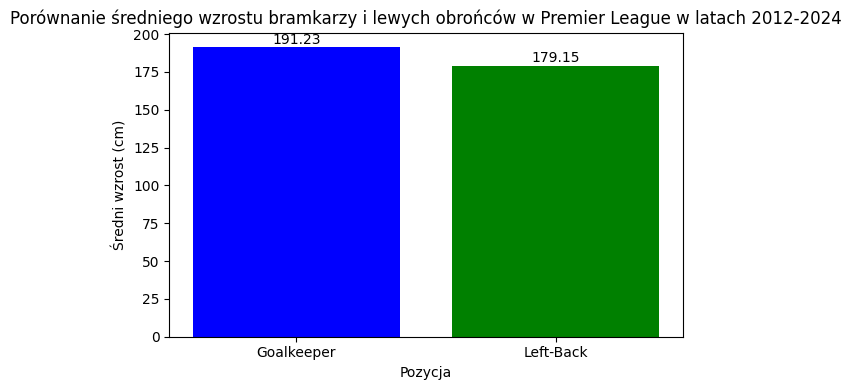

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pozycje = list(pozycja_wzrost.keys())
sredni_wzrost = list(pozycja_wzrost.values())

selected_positions = ["Goalkeeper", "Left-Back"]
filtered_pozycje = [pozycja for pozycja in pozycje if pozycja in selected_positions]
filtered_sredni_wzrost = [wzrost for pozycja, wzrost in zip(pozycje, sredni_wzrost) if pozycja in selected_positions]

plt.figure(figsize=(6, 4))
plt.bar(filtered_pozycje, filtered_sredni_wzrost, color=['blue', 'green'])
plt.title('Porównanie średniego wzrostu bramkarzy i lewych obrońców w Premier League w latach 2012-2024')
plt.xlabel('Pozycja')
plt.ylabel('Średni wzrost (cm)')

for i in range(len(filtered_pozycje)):
    plt.text(i, filtered_sredni_wzrost[i] + 0.5, str(filtered_sredni_wzrost[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#TEST LEVENEA
from scipy.stats import levene

data_goalkeeper = zad2[zad2['sub_position'] == 'Goalkeeper']['height_in_cm']
data_left_back = zad2[zad2['sub_position'] == 'Left-Back']['height_in_cm']

data_goalkeeper = data_goalkeeper.dropna()
data_left_back = data_left_back.dropna()

levene_statistic, levene_p_value = levene(data_goalkeeper, data_left_back)

print(f"Statystyka testu Levene'a: {levene_statistic}")
print(f"P-value: {levene_p_value}")

alpha_levene = 0.05
if levene_p_value < alpha_levene:
    print("Równość wariancji jest naruszona - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych statystycznie dowodów na to, że wariancje są różne między grupami.")

Statystyka testu Levene'a: 2.004456005125278
P-value: 0.15769496763151897
Brak istotnych statystycznie dowodów na to, że wariancje są różne między grupami.


In [ ]:
#TEST SHAPIRO-WILKA
from scipy.stats import shapiro

data_goalkeeper = zad2[zad2['sub_position'] == 'Goalkeeper']['height_in_cm']
data_left_back = zad2[zad2['sub_position'] == 'Left-Back']['height_in_cm']

data_goalkeeper = data_goalkeeper.dropna()
data_left_back = data_left_back.dropna()

shapiro_statistic_goalkeeper, shapiro_p_value_goalkeeper = shapiro(data_goalkeeper)
shapiro_statistic_left_back, shapiro_p_value_left_back = shapiro(data_left_back)

print(f"Test Shapiro-Wilka dla wzrostu bramkarzy:")
print(f"Statystyka testu: {shapiro_statistic_goalkeeper}")
print(f"P-value: {shapiro_p_value_goalkeeper}")

print("\nTest Shapiro-Wilka dla wzrostu lewych obrońców:")
print(f"Statystyka testu: {shapiro_statistic_left_back}")
print(f"P-value: {shapiro_p_value_left_back}")

alpha_shapiro = 0.05
if shapiro_p_value_goalkeeper < alpha_shapiro:
    print("\nWzrost bramkarzy nie pochodzi z rozkładu normalnego.")
else:
    print("\nBrak istotnych statystycznie dowodów na to, że wzrost bramkarzy pochodzi z innego rozkładu niż normalny.")

if shapiro_p_value_left_back < alpha_shapiro:
    print("Wzrost lewych obrońców nie pochodzi z rozkładu normalnego.")
else:
    print("Brak istotnych statystycznie dowodów na to, że wzrost lewych obrońców pochodzi z innego rozkładu niż normalny.")


Test Shapiro-Wilka dla wzrostu bramkarzy:
Statystyka testu: 0.9868196249008179
P-value: 0.03285942226648331

Test Shapiro-Wilka dla wzrostu lewych obrońców:
Statystyka testu: 0.9706575870513916
P-value: 0.0049308598972857

Wzrost bramkarzy nie pochodzi z rozkładu normalnego.
Wzrost lewych obrońców nie pochodzi z rozkładu normalnego.


In [ ]:
#TEST MANNA-WHITNEYA
from scipy.stats import mannwhitneyu

data_goalkeeper = zad2[zad2['sub_position'] == 'Goalkeeper']['height_in_cm'].dropna()
data_left_back = zad2[zad2['sub_position'] == 'Left-Back']['height_in_cm'].dropna()

mannwhitney_statistic, mannwhitney_p_value = mannwhitneyu(data_goalkeeper, data_left_back, alternative='two-sided')

print(f"U-statystyka Manna-Whitneya: {mannwhitney_statistic}")
print(f"Wartość p: {mannwhitney_p_value}")

alpha = 0.05
if mannwhitney_p_value < alpha:
    print("Różnice są istotne statystycznie - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych statystycznie różnic - nie odrzucamy hipotezy zerowej.")

U-statystyka Manna-Whitneya: 30167.5
Wartość p: 7.570663860547878e-51
Różnice są istotne statystycznie - odrzucamy hipotezę zerową.


## Czy drużyny, grając na własnym boisku, strzelają więcej bramek?

In [ ]:
serie_a_id = competitions[competitions['competition_code'] == "serie-a"]['competition_id'].values[0]

In [ ]:
games_serie_a = games[games['competition_id'] == serie_a_id]

In [ ]:
#bramki zdobyte u siebie
home_games_goles_serie_a = games_serie_a.groupby('home_club_name')['home_club_goals'].sum()
home_games_goles_serie_a

home_club_name
Associazione Calcio Fiorentina                17
Associazione Calcio Milan                     20
Associazione Calcio Monza                     12
Associazione Sportiva Roma                    24
Atalanta Bergamasca Calcio S.p.a.             24
Bologna Football Club 1909                    14
Cagliari Calcio                               14
Empoli Football Club S.r.l.                    8
Football Club Internazionale Milano S.p.A.    25
Frosinone Calcio S.r.l.                       20
Genoa Cricket and Football Club               14
Juventus Football Club                        17
Società Sportiva Calcio Napoli                14
Società Sportiva Lazio S.p.A.                 12
Torino Calcio                                 12
U.S. Salernitana 1919 S.r.l.                  12
Udinese Calcio                                15
Unione Sportiva Lecce                         12
Unione Sportiva Sassuolo Calcio               13
Verona Hellas Football Club                   12
Name:

In [ ]:
#zdobyte bramki na wyjeździe
away_games_goles_serie_a = games_serie_a.groupby('away_club_name')['away_club_goals'].sum()
away_games_goles_serie_a

away_club_name
Associazione Calcio Fiorentina                12
Associazione Calcio Milan                     23
Associazione Calcio Monza                      9
Associazione Sportiva Roma                    12
Atalanta Bergamasca Calcio S.p.a.             13
Bologna Football Club 1909                    11
Cagliari Calcio                                7
Empoli Football Club S.r.l.                    7
Football Club Internazionale Milano S.p.A.    25
Frosinone Calcio S.r.l.                        9
Genoa Cricket and Football Club               10
Juventus Football Club                        19
Società Sportiva Calcio Napoli                16
Società Sportiva Lazio S.p.A.                 12
Torino Calcio                                  8
U.S. Salernitana 1919 S.r.l.                   7
Udinese Calcio                                 8
Unione Sportiva Lecce                          9
Unione Sportiva Sassuolo Calcio               13
Verona Hellas Football Club                    8
Name:

In [ ]:
#roznica bramek (home-away)
roznica_goli = home_games_goles_serie_a - away_games_goles_serie_a
roznica_goli_df = pd.DataFrame({'difference': roznica_goli})
roznica_goli_df.reset_index(inplace=True)
roznica_goli_df

,home_club_name,difference
0,Associazione Calcio Fiorentina,5
1,Associazione Calcio Milan,-3
2,Associazione Calcio Monza,3
3,Associazione Sportiva Roma,12
4,Atalanta Bergamasca Calcio S.p.a.,11
5,Bologna Football Club 1909,3
6,Cagliari Calcio,7
7,Empoli Football Club S.r.l.,1
8,Football Club Internazionale Milano S.p.A.,0
9,Frosinone Calcio S.r.l.,11


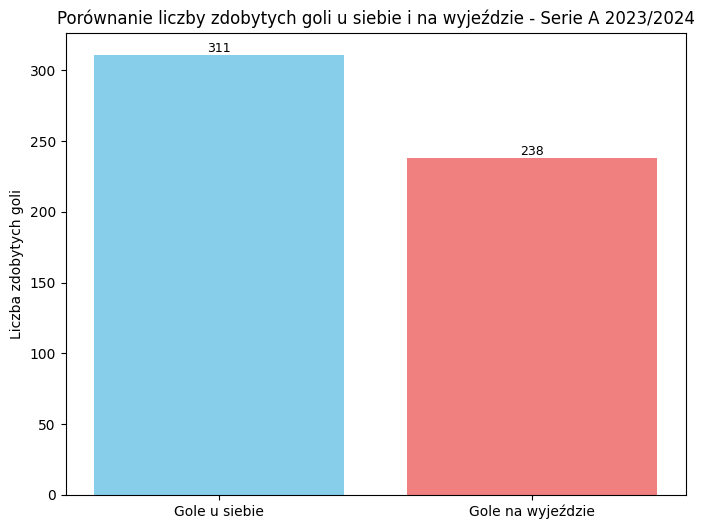

In [ ]:
import matplotlib.pyplot as plt

total_home_goals = home_games_goles_serie_a.sum()
total_away_goals = away_games_goles_serie_a.sum()

categories = ['Gole u siebie', 'Gole na wyjeździe']
values = [total_home_goals, total_away_goals]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral'])
plt.ylabel('Liczba zdobytych goli')
plt.title('Porównanie liczby zdobytych goli u siebie i na wyjeździe - Serie A 2023/2024')

for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

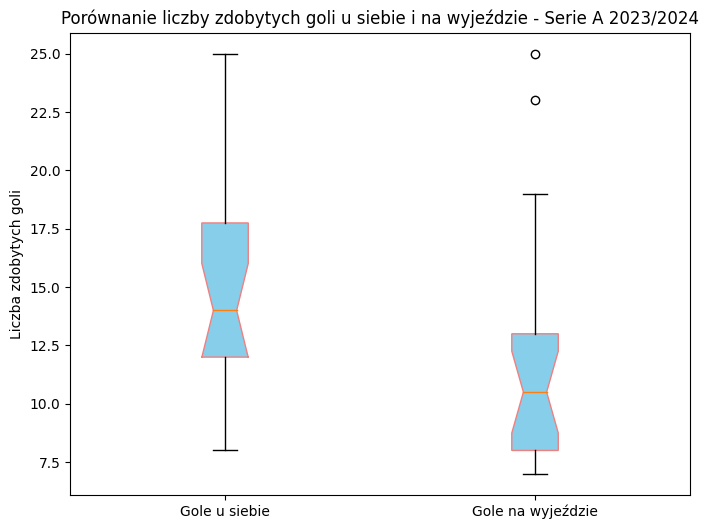

In [ ]:
import matplotlib.pyplot as plt

data_home_goals = home_games_goles_serie_a.values
data_away_goals = away_games_goles_serie_a.values

plt.figure(figsize=(8, 6))
plt.boxplot([data_home_goals, data_away_goals], labels=['Gole u siebie', 'Gole na wyjeździe'], vert=True, patch_artist=True, notch=True,boxprops = dict(facecolor='skyblue', color='lightcoral'))
plt.ylabel('Liczba zdobytych goli')
plt.title('Porównanie liczby zdobytych goli u siebie i na wyjeździe - Serie A 2023/2024')

plt.show()

In [ ]:
#TEST SAPIRO-WILKA
from scipy.stats import shapiro

statistic_home, p_value_home = shapiro(home_games_goles_serie_a)
statistic_away, p_value_away = shapiro(away_games_goles_serie_a)

print(f"Test Shapiro-Wilka dla goli u siebie - Statystyka: {statistic_home}, P-value: {p_value_home}")
print(f"Test Shapiro-Wilka dla goli na wyjeździe - Statystyka: {statistic_away}, P-value: {p_value_away}")

Test Shapiro-Wilka dla goli u siebie - Statystyka: 0.8774148225784302, P-value: 0.01590132713317871
Test Shapiro-Wilka dla goli na wyjeździe - Statystyka: 0.8270021677017212, P-value: 0.0022478585597127676


In [ ]:
#TEST LEVENA
from scipy.stats import levene

levene_statistic, levene_p_value = levene(home_games_goles_serie_a, away_games_goles_serie_a)

print(f"Statystyka testu Levene: {levene_statistic}")
print(f"P-value dla testu Levene: {levene_p_value}")

alpha_levene = 0.05
if levene_p_value < alpha_levene:
    print("Równość wariancji nie jest spełniona - odrzucamy hipotezę zerową.")
else:
    print("Brak dowodów na brak równości wariancji - nie odrzucamy hipotezy zerowej.")

Statystyka testu Levene: 0.04637313287122912
P-value dla testu Levene: 0.830650608300258
Brak dowodów na brak równości wariancji - nie odrzucamy hipotezy zerowej.


In [ ]:
#TEST T STUDENTA
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(home_games_goles_serie_a, away_games_goles_serie_a)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Różnice są istotne statystycznie - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych statystycznie różnic - nie odrzucamy hipotezy zerowej.")

T-statistic: 3.747157199171343
P-value: 0.0013648003616092235
Różnice są istotne statystycznie - odrzucamy hipotezę zerową.


In [ ]:
#TEST COHENA
from numpy import mean, std

data_home_goals = home_games_goles_serie_a.values
data_away_goals = away_games_goles_serie_a.values

def cohen_d(group1, group2):
    """
    Oblicza indeks Cohena dla dwóch grup.
    """
    mean_diff = mean(group1) - mean(group2)
    pooled_std = ((std(group1) ** 2 + std(group2) ** 2) / 2) ** 0.5
    cohen_d = mean_diff / pooled_std
    return cohen_d

cohen_effect_size = cohen_d(data_home_goals, data_away_goals)

print(f"Indeks Cohena: {cohen_effect_size}")

Indeks Cohena: 0.7542425154314323


## Na jakiej pozycji piłkarze mają najwięcej żółtych kartek?

In [ ]:
zad4 = pd.merge(zad2, apps, on="player_id")

In [ ]:
yellow_cards = zad4.groupby("sub_position")['yellow_cards'].sum()

In [ ]:
cards_df = pd.concat([yellow_cards, red_cards], axis=1)

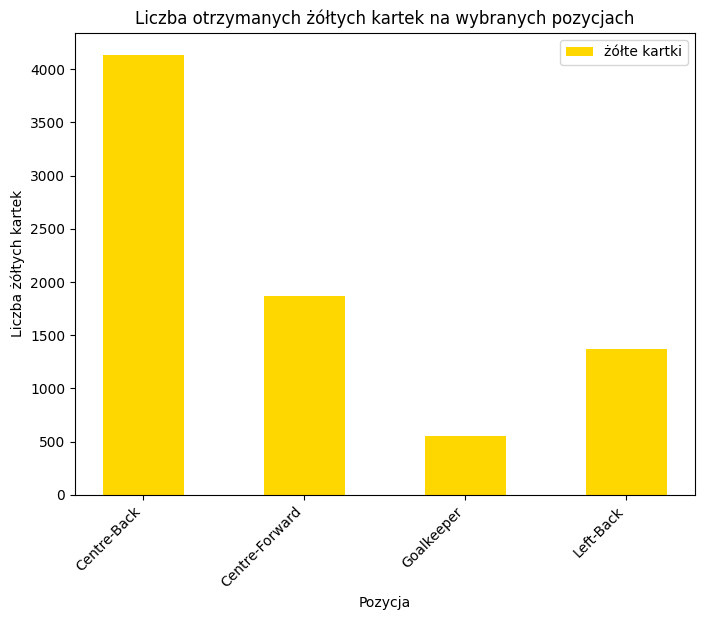

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


red_cards_filtered = zad4[zad4['sub_position'].isin(['Centre-Forward', 'Left-Back', 'Goalkeeper', 'Centre-Back'])].groupby("sub_position")['yellow_cards'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

positions_filtered = red_cards_filtered.index
red_cards_filtered_values = red_cards_filtered.values

bar_width = 0.50

index_filtered = range(len(positions_filtered))

bar1 = ax.bar(index_filtered, red_cards_filtered_values, bar_width, label='żółte kartki', color='gold')

ax.set_xlabel('Pozycja')
ax.set_ylabel('Liczba żółtych kartek')
ax.set_title('Liczba otrzymanych żółtych kartek na wybranych pozycjach')
ax.set_xticks([i for i in index_filtered])
ax.set_xticklabels(positions_filtered, rotation=45, ha='right')
ax.legend()

plt.show()


In [ ]:
# TEST LEVENEA
pozycje = zad4['sub_position'].unique()
dane_zolte_kartki = [zad4[zad4['sub_position'] == pos]['yellow_cards'].dropna() for pos in pozycje]

statystyka, wartosc_p = levene(*dane_zolte_kartki)
print(f"Statystyka testu Levene'a: {statystyka}")
print(f"Wartość p: {wartosc_p}")

if wartosc_p < 0.05:
    print("Odrzucamy hipotezę zerową - istnieją istotne różnice w wariancji pomiędzy grupami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnych różnic w wariancji pomiędzy grupami.")

Statystyka testu Levene'a: nan
Wartość p: nan
Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnych różnic w wariancji pomiędzy grupami.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#TEST KRUSKALA-WILLISA
from scipy.stats import kruskal

statystyka_kw, wartosc_p_kw = kruskal(*dane_zolte_kartki)

print(f"Statystyka testu Kruskalla-Wallisa: {statystyka_kw}")
print(f"Wartość p: {wartosc_p_kw}")

if wartosc_p_kw < 0.05:
    print("Odrzucamy hipotezę zerową - istnieją istotne różnice pomiędzy co najmniej dwoma grupami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnych różnic pomiędzy grupami.")

Statystyka testu Kruskalla-Wallisa: nan
Wartość p: nan
Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnych różnic pomiędzy grupami.


## Czy jest różnica w średnim wieku kapitanów drużyn w poszczególnych ligach?




In [ ]:
kapitanowie = game_lineups[game_lineups["team_captain"] == 1]

In [ ]:
kapitanowie.head()

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
12,be9fbdcde744131e27d57f1ad13bbfd7,2317258,610,starting_lineup,10,45509,Siem de Jong,1,Attacking Midfield
21,0950259bdf02b7086d893a266de7b5b9,2317258,1090,starting_lineup,4,93081,Nick Viergever,1,Left-Back
73,e4ed89ef52777c41b7c2a96a1bef5450,2320447,16,starting_lineup,5,410,Sebastian Kehl,1,Defensive Midfield
82,ca43c886dbc8e84465d24383e4d72cb9,2320447,96,starting_lineup,14,36351,Matthias Tietz,1,Attacking Midfield
110,9f6e1256c83e46dc9fa6a4f596d7db6b,2320448,41,starting_lineup,23,4192,Rafael van der Vaart,1,Attacking Midfield


In [ ]:
zad_y = pd.merge(kapitanowie, players, on="player_id")

<ipython-input-124-2d3c7febfcff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captains_2023['age'] = (pd.to_datetime('today') - pd.to_datetime(captains_2023['date_of_birth'])).astype('<m8[Y]')


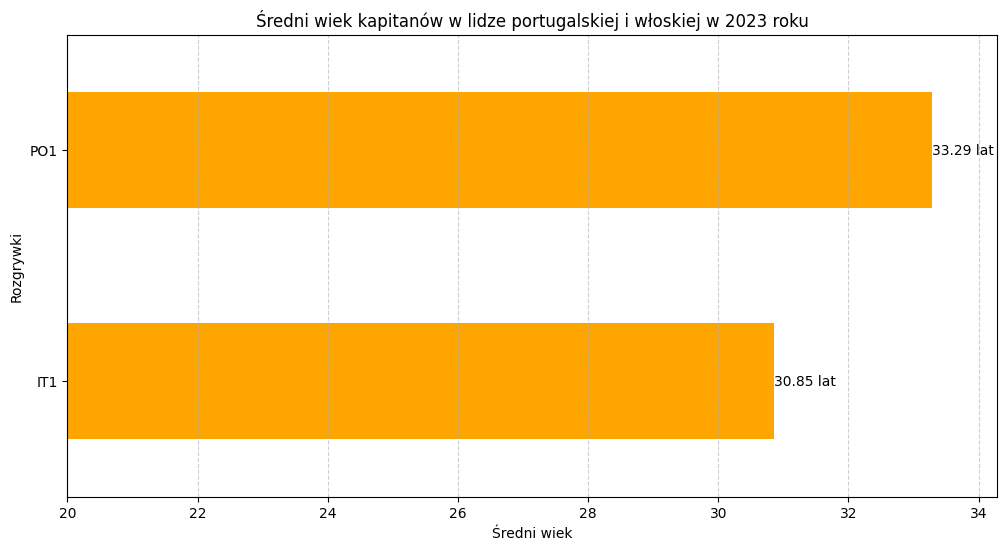

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


kapitanowie = game_lineups[game_lineups["team_captain"] == 1]
zad_y = pd.merge(kapitanowie, players, on="player_id")
captains_2023 = zad_y[(zad_y['team_captain'] == 1) & (zad_y['last_season'] == 2023)]


captains_2023['age'] = (pd.to_datetime('today') - pd.to_datetime(captains_2023['date_of_birth'])).astype('<m8[Y]')

selected_leagues = ['PO1', 'IT1']
captains_2023_selected = captains_2023[captains_2023['current_club_domestic_competition_id'].isin(selected_leagues)]
average_age_by_league = captains_2023_selected.groupby('current_club_domestic_competition_id')['age'].mean()

plt.figure(figsize=(12, 6))
bar_plot = average_age_by_league.sort_values().plot(kind='barh', color='orange')
for index, value in enumerate(average_age_by_league.sort_values()):
    bar_plot.text(value, index, f'{value:.2f} lat', ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Średni wiek')
plt.ylabel('Rozgrywki')
plt.title('Średni wiek kapitanów w lidze portugalskiej i włoskiej w 2023 roku')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.xlim(20, max(average_age_by_league)+1)

plt.show()

In [ ]:
#TEST SHAPIRO-WILKA
from scipy.stats import shapiro

age_data_portugal = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'PO1']['age']
age_data_italy = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'IT1']['age']

shapiro_statistic_portugal, shapiro_p_value_portugal = shapiro(age_data_portugal)
shapiro_statistic_italy, shapiro_p_value_italy = shapiro(age_data_italy)

print("Dla ligi portugalskiej:")
print(f"Statystyka testu Shapiro-Wilka: {shapiro_statistic_portugal}")
print(f"P-value dla testu Shapiro-Wilka: {shapiro_p_value_portugal}")
print("\nDla ligi włoskiej:")
print(f"Statystyka testu Shapiro-Wilka: {shapiro_statistic_italy}")
print(f"P-value dla testu Shapiro-Wilka: {shapiro_p_value_italy}")

alpha_shapiro = 0.05
if shapiro_p_value_portugal < alpha_shapiro:
    print("Rozkład wieku kapitanów w lidze portugalskiej nie jest normalny - odrzucamy hipotezę zerową.")
else:
    print("Brak dowodów na to, że rozkład wieku kapitanów w lidze portugalskiej nie jest normalny - nie odrzucamy hipotezy zerowej.")

if shapiro_p_value_italy < alpha_shapiro:
    print("Rozkład wieku kapitanów w lidze włoskiej nie jest normalny - odrzucamy hipotezę zerową.")
else:
    print("Brak dowodów na to, że rozkład wieku kapitanów w lidze włoskiej nie jest normalny - nie odrzucamy hipotezy zerowej.")

Dla ligi portugalskiej:
Statystyka testu Shapiro-Wilka: 0.9469043612480164
P-value dla testu Shapiro-Wilka: 3.3564926033365974e-27

Dla ligi włoskiej:
Statystyka testu Shapiro-Wilka: 0.9743697047233582
P-value dla testu Shapiro-Wilka: 2.471190404860773e-24
Rozkład wieku kapitanów w lidze portugalskiej nie jest normalny - odrzucamy hipotezę zerową.
Rozkład wieku kapitanów w lidze włoskiej nie jest normalny - odrzucamy hipotezę zerową.


In [ ]:
#TEST LEVENEA
from scipy.stats import levene

age_data_portugal = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'PO1']['age']
age_data_italy = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'IT1']['age']

levene_statistic, levene_p_value = levene(age_data_portugal, age_data_italy)

print(f"Statystyka testu Levene: {levene_statistic}")
print(f"P-value dla testu Levene: {levene_p_value}")

alpha_levene = 0.05
if levene_p_value < alpha_levene:
    print("Równość wariancji nie jest spełniona - odrzucamy hipotezę zerową.")
else:
    print("Brak dowodów na brak równości wariancji - nie odrzucamy hipotezy zerowej.")

Statystyka testu Levene: 388.90249868465844
P-value dla testu Levene: 9.710320179171413e-84
Równość wariancji nie jest spełniona - odrzucamy hipotezę zerową.


In [ ]:
#TEST MANNA-WHITNEYA
from scipy.stats import mannwhitneyu

age_data_portugal = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'PO1']['age']
age_data_italy = captains_2023_selected[captains_2023_selected['current_club_domestic_competition_id'] == 'IT1']['age']

mannwhitneyu_statistic, mannwhitneyu_p_value = mannwhitneyu(age_data_portugal, age_data_italy)

print(f"Statystyka testu Manna-Whitneya: {mannwhitneyu_statistic}")
print(f"P-value dla testu Manna-Whitneya: {mannwhitneyu_p_value}")

alpha_mannwhitneyu = 0.05
if mannwhitneyu_p_value < alpha_mannwhitneyu:
    print("Różnice są istotne statystycznie - odrzucamy hipotezę zerową.")
else:
    print("Brak istotnych statystycznie różnic - nie odrzucamy hipotezy zerowej.")

Statystyka testu Manna-Whitneya: 4908649.5
P-value dla testu Manna-Whitneya: 1.352546632150861e-97
Różnice są istotne statystycznie - odrzucamy hipotezę zerową.
